In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Hourly_Energy_consumption.csv to Hourly_Energy_consumption (4).csv
User uploaded file "Hourly_Energy_consumption (4).csv" with length 2910418 bytes


In [ ]:
import pandas as pd
import io

file_name = list(uploaded.keys())[0]
energy_consump_df = pd.read_csv(io.StringIO(uploaded[file_name].decode('utf-8')))
energy_consump_df

,Datetime,AEP_MW
0,31-12-2004 01:00,13478
1,31-12-2004 02:00,12865
2,31-12-2004 03:00,12577
3,31-12-2004 04:00,12517
4,31-12-2004 05:00,12670
...,...,...
121268,01-01-2018 20:00,21089
121269,01-01-2018 21:00,20999
121270,01-01-2018 22:00,20820
121271,01-01-2018 23:00,20415


In [ ]:
min_val = energy_consump_df['AEP_MW'].min()
max_val = energy_consump_df['AEP_MW'].max()

print(f"Range of AEP_MW: {min_val:.2f} MW to {max_val:.2f} MW")


Range of AEP_MW: 9581.00 MW to 25695.00 MW


# 🏔 Time Series plot on hourly basis .

/tmp/ipython-input-2216947601.py:5: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  energy_consump_df["Datetime"] = pd.to_datetime(energy_consump_df["Datetime"])


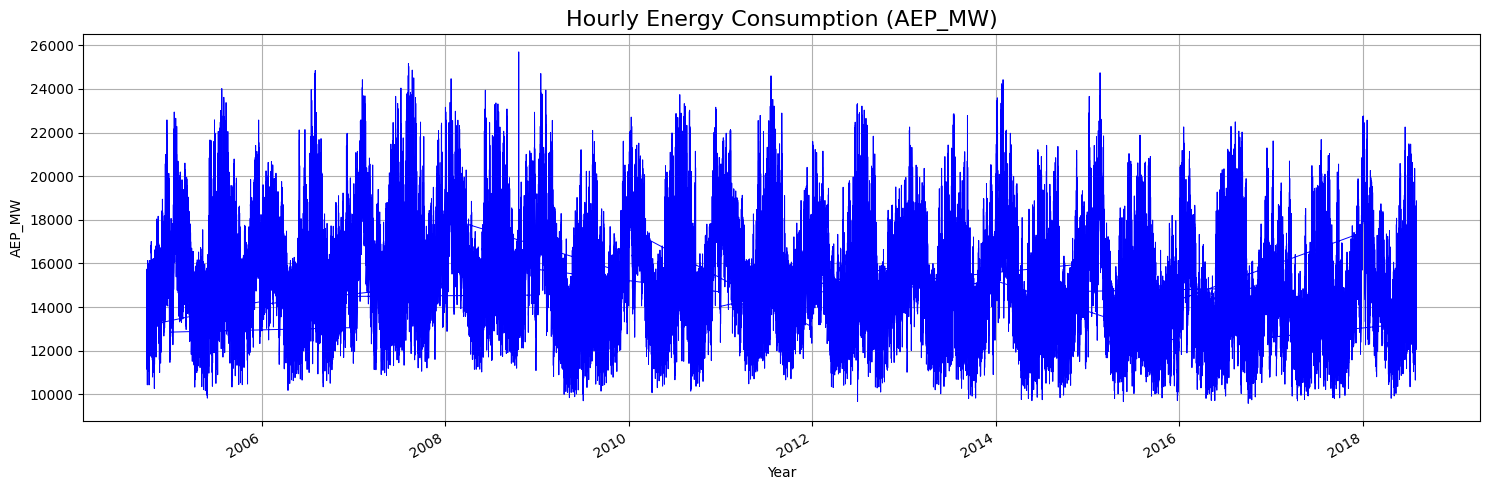

In [ ]:
import matplotlib.pyplot as plt

# Assuming energy_consump_df is already loaded and has 'Datetime' and 'AEP_MW'
# Convert to datetime just in case
energy_consump_df["Datetime"] = pd.to_datetime(energy_consump_df["Datetime"])

# Set Datetime as index
energy_consump_df = energy_consump_df.set_index("Datetime")

# Plot the hourly time series
plt.figure(figsize=(15,5))
energy_consump_df["AEP_MW"].plot(color="blue", linewidth=0.7)
plt.title("Hourly Energy Consumption (AEP_MW)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("AEP_MW")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

# Daily seasonality (24 hours)
add_decomp = seasonal_decompose(energy_consump_df["AEP_MW"], model="additive", period=24)
mul_decomp = seasonal_decompose(energy_consump_df["AEP_MW"], model="multiplicative", period=24)

# Residuals
add_resid = add_decomp.resid.dropna()
mul_resid = mul_decomp.resid.dropna()

# Variance
var_add = np.var(add_resid)
var_mul = np.var(mul_resid)

print("Variance of residuals (Additive):", var_add)
print("Variance of residuals (Multiplicative):", var_mul)


Variance of residuals (Additive): 2861810.854117778
Variance of residuals (Multiplicative): 0.011479544109654618


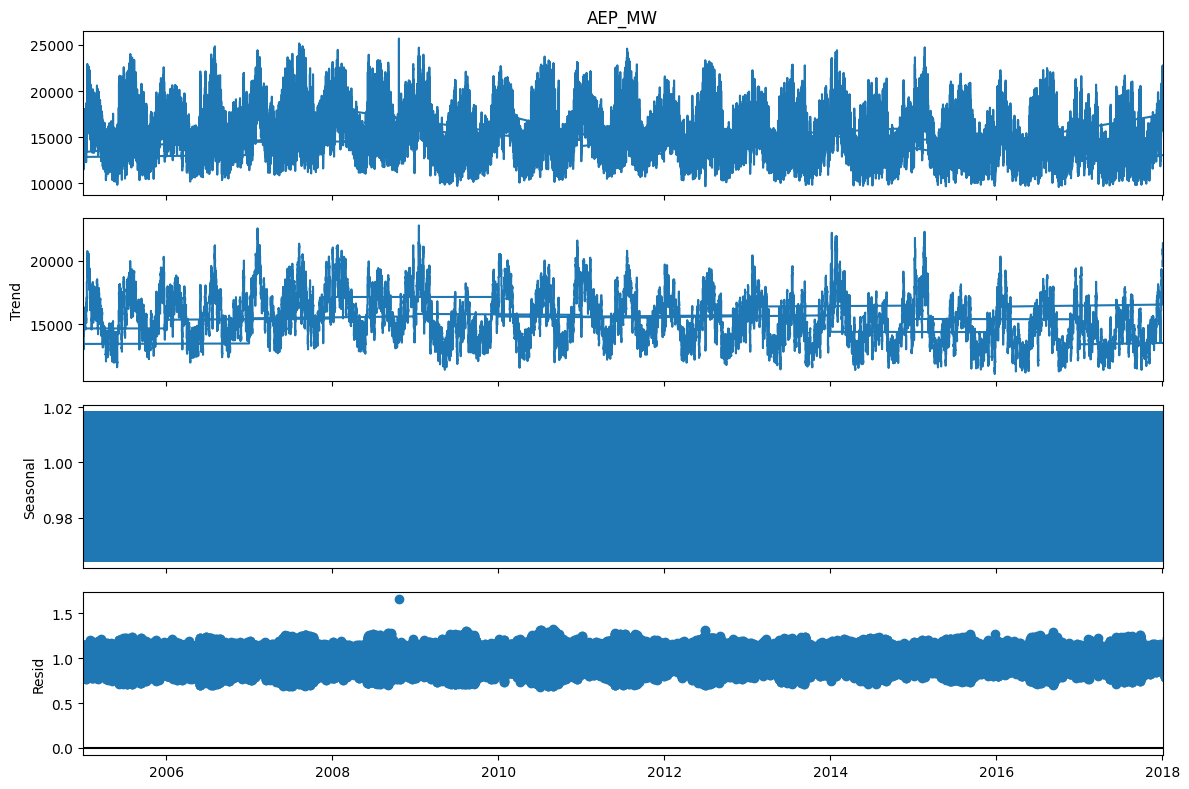

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose with daily seasonality (24 hours)
decomposition = seasonal_decompose(
    energy_consump_df["AEP_MW"],
    model="multiplicative",
    period=24
)

# Plot decomposition
plt.rcParams.update({'figure.figsize': (12,8)})
decomposition.plot()
plt.show()


In [ ]:
energy_consump_df

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478
2004-12-31 02:00:00,12865
2004-12-31 03:00:00,12577
2004-12-31 04:00:00,12517
2004-12-31 05:00:00,12670
...,...
2018-01-01 20:00:00,21089
2018-01-01 21:00:00,20999
2018-01-01 22:00:00,20820


In [ ]:
import numpy as np

# Add a new column with log-transformed values
energy_consump_df['log_AEP_MW'] = np.log(energy_consump_df['AEP_MW'])

# Check result
print(energy_consump_df.head())


                     AEP_MW  log_AEP_MW
Datetime                               
2004-12-31 01:00:00   13478    9.508814
2004-12-31 02:00:00   12865    9.462266
2004-12-31 03:00:00   12577    9.439625
2004-12-31 04:00:00   12517    9.434843
2004-12-31 05:00:00   12670    9.446992


In [ ]:
energy_consump_df = energy_consump_df.drop(columns=['AEP_MW'])
energy_consump_df

,log_AEP_MW
Datetime,
2004-12-31 01:00:00,9.508814
2004-12-31 02:00:00,9.462266
2004-12-31 03:00:00,9.439625
2004-12-31 04:00:00,9.434843
2004-12-31 05:00:00,9.446992
...,...
2018-01-01 20:00:00,9.956507
2018-01-01 21:00:00,9.952230
2018-01-01 22:00:00,9.943669


In [ ]:
from sklearn.preprocessing import StandardScaler

# Step 1: Train-test split (90% train, 10% test)
split_index = int(len(energy_consump_df) * 0.9)
train = energy_consump_df.iloc[:split_index].copy()
test  = energy_consump_df.iloc[split_index:].copy()

# Step 2: Initialize StandardScaler
scaler = StandardScaler()

# Step 3: Fit scaler on training data
train_scaled = train.copy()
train_scaled.iloc[:, :] = scaler.fit_transform(train)

# Step 4: Transform test data using same scaler
test_scaled = test.copy()
test_scaled.iloc[:, :] = scaler.transform(test)

# ✅ train_scaled and test_scaled are ready
print(train_scaled.head())
print(test_scaled.head())


                     log_AEP_MW
Datetime                       
2004-12-31 01:00:00   -0.789538
2004-12-31 02:00:00   -1.069649
2004-12-31 03:00:00   -1.205893
2004-12-31 04:00:00   -1.234670
2004-12-31 05:00:00   -1.161560
                     log_AEP_MW
Datetime                       
2017-10-19 15:00:00   -0.529580
2017-10-19 16:00:00   -0.538138
2017-10-19 17:00:00   -0.572493
2017-10-19 18:00:00   -0.620053
2017-10-19 19:00:00   -0.628306


In [ ]:
train_scaled

,log_AEP_MW
Datetime,
2004-12-31 01:00:00,-0.789538
2004-12-31 02:00:00,-1.069649
2004-12-31 03:00:00,-1.205893
2004-12-31 04:00:00,-1.234670
2004-12-31 05:00:00,-1.161560
...,...
2017-10-19 10:00:00,-0.427821
2017-10-19 11:00:00,-0.481030
2017-10-19 12:00:00,-0.554432


In [ ]:
test_scaled

,log_AEP_MW
Datetime,
2017-10-19 15:00:00,-0.529580
2017-10-19 16:00:00,-0.538138
2017-10-19 17:00:00,-0.572493
2017-10-19 18:00:00,-0.620053
2017-10-19 19:00:00,-0.628306
...,...
2018-01-01 20:00:00,1.904520
2018-01-01 21:00:00,1.878784
2018-01-01 22:00:00,1.827268


# Applying Simple RNN

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error, r2_score

# -------------------------------
# 1. Prepare data for RNN
# -------------------------------
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:i+seq_length].values)   # rows for X
        y.append(data.iloc[i+seq_length].values)     # target row
    return np.array(X), np.array(y)

seq_length = 24  # 1-day hourly window
X_train, y_train = create_sequences(train_scaled, seq_length)
X_test, y_test   = create_sequences(test_scaled, seq_length)

# Reshape for RNN [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test  = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# -------------------------------
# 2. Build simple RNN model
# -------------------------------
model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(seq_length, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# -------------------------------
# 3. Train model
# -------------------------------
history = model.fit(
    X_train, y_train,
    epochs=10, batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

# -------------------------------
# 4. Evaluate
# -------------------------------
y_train_pred = model.predict(X_train)
y_test_pred  = model.predict(X_test)

# Compute metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse  = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_r2 = r2_score(y_train, y_train_pred)
test_r2  = r2_score(y_test, y_test_pred)

print(f"Train RMSE_simpleRNN: {train_rmse:.4f}, R2_simpleRNN: {train_r2:.4f}")
print(f"Test  RMSE_simpleRNN: {test_rmse:.4f}, R2_simpleRNN: {test_r2:.4f}")


Epoch 1/10
3411/3411 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - loss: 0.0522 - val_loss: 0.0209
Epoch 2/10
3411/3411 ━━━━━━━━━━━━━━━━━━━━ 38s 6ms/step - loss: 0.0192 - val_loss: 0.0177
Epoch 3/10
3411/3411 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - loss: 0.0173 - val_loss: 0.0190
Epoch 4/10
3411/3411 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - loss: 0.0170 - val_loss: 0.0165
Epoch 5/10
3411/3411 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - loss: 0.0160 - val_loss: 0.0176
Epoch 6/10
3411/3411 ━━━━━━━━━━━━━━━━━━━━ 40s 6ms/step - loss: 0.0154 - val_loss: 0.0162
Epoch 7/10
3411/3411 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - loss: 0.0150 - val_loss: 0.0160
Epoch 8/10
3411/3411 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - loss: 0.0150 - val_loss: 0.0147
Epoch 9/10
3411/3411 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - loss: 0.0143 - val_loss: 0.0169
Epoch 10/10
3411/3411 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - loss: 0.0137 - val_loss: 0.0174
3411/3411 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Train RMSE_simpleRNN: 0.1

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error, r2_score

# LSTM model
model_lstm = keras.Sequential([
    layers.LSTM(64, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mse')

# Train
history_lstm = model_lstm.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

# Predictions
y_train_pred_lstm = model_lstm.predict(X_train)
y_test_pred_lstm  = model_lstm.predict(X_test)

# Metrics
train_rmse_lstm = np.sqrt(mean_squared_error(y_train, y_train_pred_lstm))
test_rmse_lstm  = np.sqrt(mean_squared_error(y_test, y_test_pred_lstm))

train_r2_lstm = r2_score(y_train, y_train_pred_lstm)
test_r2_lstm  = r2_score(y_test, y_test_pred_lstm)

print(f"Train RMSE_LSTM: {train_rmse_lstm:.4f}, R2_LSTM: {train_r2_lstm:.4f}")
print(f"Test  RMSE_LSTM: {test_rmse_lstm:.4f}, R2_LSTM: {test_r2_lstm:.4f}")


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3069/3069 ━━━━━━━━━━━━━━━━━━━━ 39s 12ms/step - loss: 0.0825 - val_loss: 0.0226
Epoch 2/20
3069/3069 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - loss: 0.0194 - val_loss: 0.0194
Epoch 3/20
3069/3069 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - loss: 0.0178 - val_loss: 0.0207
Epoch 4/20
3069/3069 ━━━━━━━━━━━━━━━━━━━━ 34s 11ms/step - loss: 0.0162 - val_loss: 0.0161
Epoch 5/20
3069/3069 ━━━━━━━━━━━━━━━━━━━━ 34s 11ms/step - loss: 0.0149 - val_loss: 0.0162
Epoch 6/20
3069/3069 ━━━━━━━━━━━━━━━━━━━━ 42s 12ms/step - loss: 0.0140 - val_loss: 0.0160
Epoch 7/20
3069/3069 ━━━━━━━━━━━━━━━━━━━━ 34s 11ms/step - loss: 0.0133 - val_loss: 0.0145
Epoch 8/20
3069/3069 ━━━━━━━━━━━━━━━━━━━━ 33s 11ms/step - loss: 0.0129 - val_loss: 0.0144
Epoch 9/20
3069/3069 ━━━━━━━━━━━━━━━━━━━━ 42s 11ms/step - loss: 0.0125 - val_loss: 0.0137
Epoch 10/20
3069/3069 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - loss: 0.0124 - val_loss: 0.0135
Epoch 11/20
3069/3069 ━━━━━━━━━━━━━━━━━━━━ 33s 11ms/step - loss: 0.0117 - val_loss: 0.0159
Epoch 12/20
3069/30

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error, r2_score

# GRU model
model_gru = keras.Sequential([
    layers.GRU(64, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(1)
])

model_gru.compile(optimizer='adam', loss='mse')

# Train
history_gru = model_gru.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

# Predictions
y_train_pred_gru = model_gru.predict(X_train)
y_test_pred_gru  = model_gru.predict(X_test)

# Metrics
train_rmse_gru = np.sqrt(mean_squared_error(y_train, y_train_pred_gru))
test_rmse_gru  = np.sqrt(mean_squared_error(y_test, y_test_pred_gru))

train_r2_gru = r2_score(y_train, y_train_pred_gru)
test_r2_gru  = r2_score(y_test, y_test_pred_gru)

print(f"Train RMSE_GRU: {train_rmse_gru:.4f}, R2_GRU: {train_r2_gru:.4f}")
print(f"Test  RMSE_GRU: {test_rmse_gru:.4f}, R2_GRU: {test_r2_gru:.4f}")


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3069/3069 ━━━━━━━━━━━━━━━━━━━━ 38s 12ms/step - loss: 0.0951 - val_loss: 0.0240
Epoch 2/20
3069/3069 ━━━━━━━━━━━━━━━━━━━━ 36s 12ms/step - loss: 0.0220 - val_loss: 0.0190
Epoch 3/20
3069/3069 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - loss: 0.0186 - val_loss: 0.0188
Epoch 4/20
3069/3069 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - loss: 0.0162 - val_loss: 0.0188
Epoch 5/20
3069/3069 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - loss: 0.0148 - val_loss: 0.0167
Epoch 6/20
3069/3069 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - loss: 0.0138 - val_loss: 0.0157
Epoch 7/20
3069/3069 ━━━━━━━━━━━━━━━━━━━━ 36s 12ms/step - loss: 0.0133 - val_loss: 0.0203
Epoch 8/20
3069/3069 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - loss: 0.0125 - val_loss: 0.0159
Epoch 9/20
3069/3069 ━━━━━━━━━━━━━━━━━━━━ 37s 12ms/step - loss: 0.0120 - val_loss: 0.0138
Epoch 10/20
3069/3069 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - loss: 0.0115 - val_loss: 0.0148
Epoch 11/20
3069/3069 ━━━━━━━━━━━━━━━━━━━━ 38s 12ms/step - loss: 0.0111 - val_loss: 0.0146
Epoch 12/20
3069/30

379/379 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


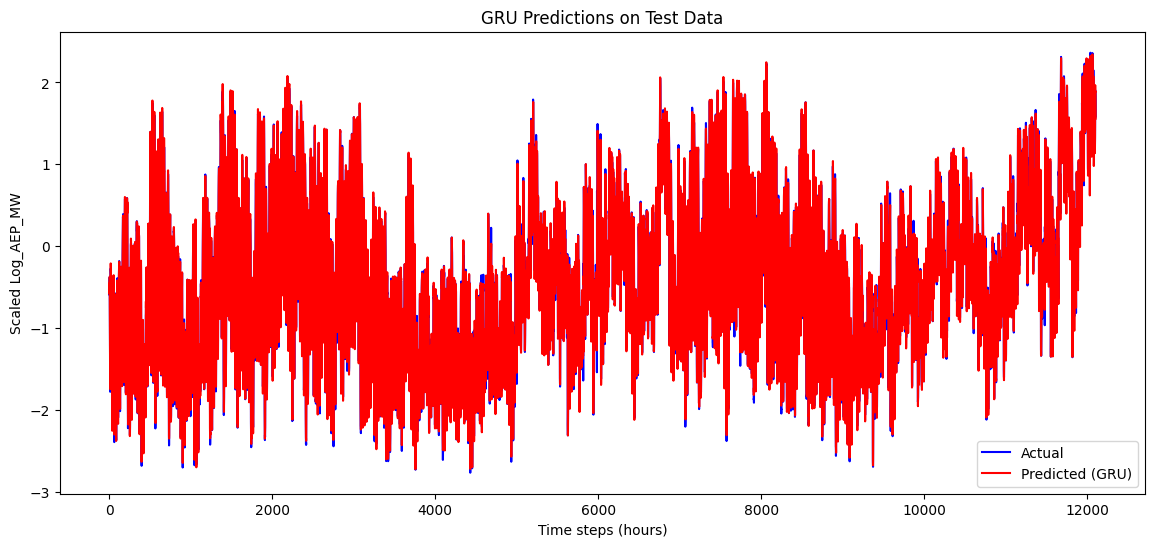

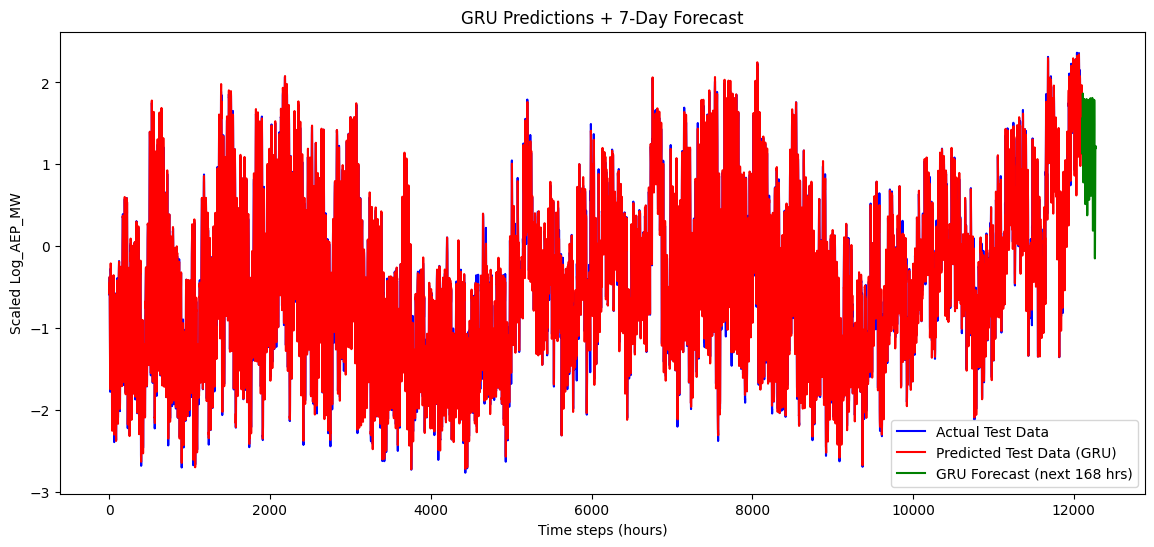

In [ ]:
import matplotlib.pyplot as plt

# ---- 1. Predictions on test data ----
y_test_pred = model_gru.predict(X_test)

plt.figure(figsize=(14,6))
plt.plot(y_test, label="Actual", color="blue")
plt.plot(y_test_pred, label="Predicted (GRU)", color="red")
plt.title("GRU Predictions on Test Data")
plt.xlabel("Time steps (hours)")
plt.ylabel("Scaled Log_AEP_MW")
plt.legend()
plt.show()


# ---- 2. Forecast next 168 steps ----
future_steps = 168
last_sequence = X_test[-1]  # take last sequence from test
future_predictions = []

current_seq = last_sequence

for _ in range(future_steps):
    next_pred = model_gru.predict(current_seq.reshape(1, seq_length, 1), verbose=0)
    future_predictions.append(next_pred[0,0])

    # update sequence with new predicted value
    current_seq = np.append(current_seq[1:], next_pred).reshape(seq_length,1)

# Plot Forecast
plt.figure(figsize=(14,6))
plt.plot(range(len(y_test)), y_test, label="Actual Test Data", color="blue")
plt.plot(range(len(y_test)), y_test_pred, label="Predicted Test Data (GRU)", color="red")
plt.plot(range(len(y_test), len(y_test)+future_steps), future_predictions,
         label="GRU Forecast (next 168 hrs)", color="green")
plt.title("GRU Predictions + 7-Day Forecast")
plt.xlabel("Time steps (hours)")
plt.ylabel("Scaled Log_AEP_MW")
plt.legend()
plt.show()


379/379 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


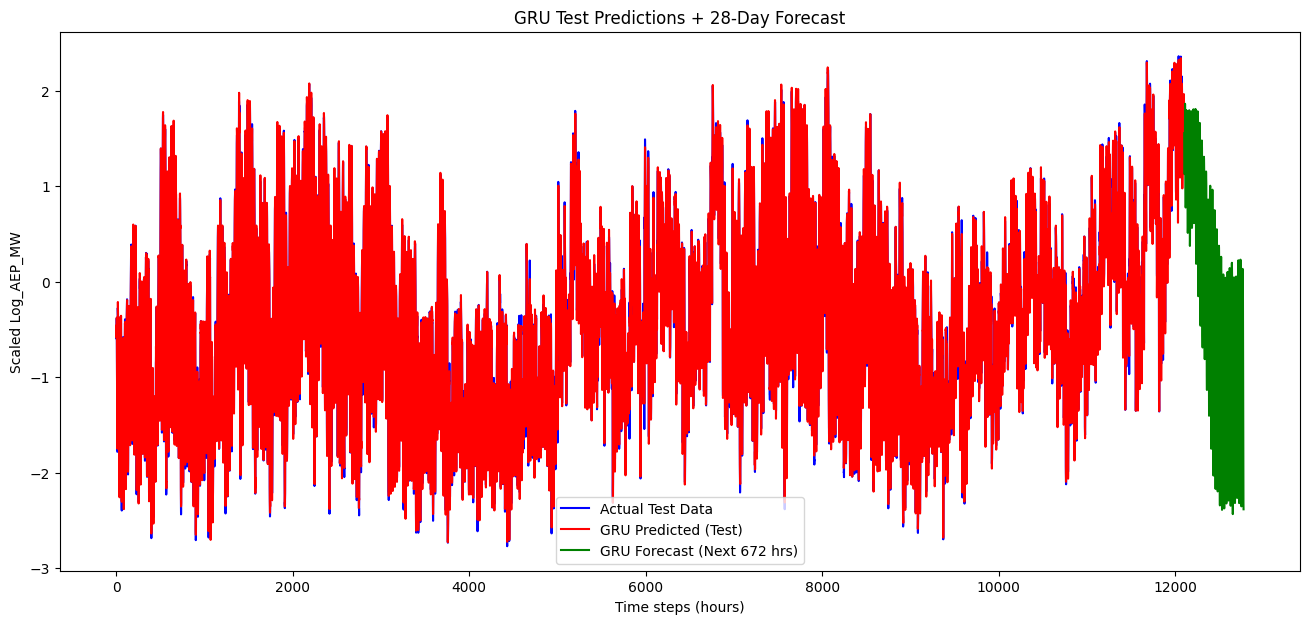

In [ ]:
import matplotlib.pyplot as plt

# ---- Predictions on test data ----
y_test_pred = model_gru.predict(X_test)

# ---- Forecast next 672 steps (28 days) ----
future_steps = 672
last_sequence = X_test[-1]  # last known sequence
future_predictions = []

current_seq = last_sequence.copy()

for _ in range(future_steps):
    next_pred = model_gru.predict(current_seq.reshape(1, seq_length, 1), verbose=0)
    future_predictions.append(next_pred[0,0])
    # update sequence
    current_seq = np.append(current_seq[1:], next_pred).reshape(seq_length,1)

# ---- Single Plot ----
plt.figure(figsize=(16,7))

# Actual Test
plt.plot(range(len(y_test)), y_test, label="Actual Test Data", color="blue")

# Predicted Test
plt.plot(range(len(y_test)), y_test_pred, label="GRU Predicted (Test)", color="red")

# Future Forecast
plt.plot(range(len(y_test), len(y_test)+future_steps), future_predictions,
         label="GRU Forecast (Next 672 hrs)", color="green")

plt.title("GRU Test Predictions + 28-Day Forecast")
plt.xlabel("Time steps (hours)")
plt.ylabel("Scaled Log_AEP_MW")
plt.legend()
plt.show()


# Time Series Forecasting: Hourly Energy Consumption (Log AEP_MW)

## Data Preparation
- Dataset: Hourly **energy consumption** data (`AEP_MW`)
- Log transformation applied → `log_AEP_MW`
- Train-Test Split: **90% train**, **10% test**
- Standard scaling applied (fit on train, transform on test)
- Sequence window: **24 hours**

---

## Models Applied

### 1. Simple RNN
- **Train RMSE**: 0.1265  
- **Train R²**: 0.9840  
- **Test RMSE**: 0.1321  
- **Test R²**: 0.9823  

---

### 2. LSTM
- **Train RMSE**: 0.0988  
- **Train R²**: 0.9902  
- **Test RMSE**: 0.1077  
- **Test R²**: 0.9883  

---

### 3. GRU
- **Train RMSE**: 0.0957  
- **Train R²**: 0.9908  
- **Test RMSE**: 0.1040  
- **Test R²**: 0.9890  

---

## Forecasting with GRU
- Test predictions closely track the actual test data.  
- **Next 672 hours (28 days)** forecast generated using recursive GRU prediction.  
- Results visualized in a single plot:
  - **Blue** → Actual Test Data  
  - **Red** → GRU Predicted (Test)  
  - **Green** → GRU Forecast (Next 28 Days)  

---

## Key Takeaways
- All recurrent models (RNN, LSTM, GRU) performed well, but **GRU** achieved the **best accuracy** with the lowest RMSE and highest R².  
- GRU shows strong generalization and reliable **short-term & long-term forecasting** ability.  
- Forecast indicates the model effectively captures **hourly consumption patterns** for future predictions.  
